# Data Science From Scratch


### Chapter 8: Gradient Descent


##### The Idea Behind Gradient Descent

Gradient descent uses the gradient, or partial derivative of a function indicating the direction of greatest slope, to maximize or minimize functions such as the one below. 

In [10]:
import numpy as np
from scratch.linear_algebra import Vector, dot

In [11]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return np.dot(v, v)

In [26]:
v = [1, 2, 3, 4]

In [27]:
sum_of_squares(v)

30

##### Estimating the Gradient

In [13]:
from typing import Callable

The derivative is the limite of the difference quotient.

In [14]:
def difference_quotient(f: Callable[[float], float], 
                        x: float,
                       h: float) -> float:
    return (f(x + h) - f(x)) / h

It is easier to calculate the derivative of some functions than others. For example, the derivative of the square function is simply a doubling function.

In [15]:
def square(x: float) -> float:
    return x * x

In [16]:
def derivative(x: float) -> float:
    return 2 * x

If we could not, or did not want to, find the gradient in a given circumstance, we can estimate the derivative by evaluating a difference quotient with a small e.

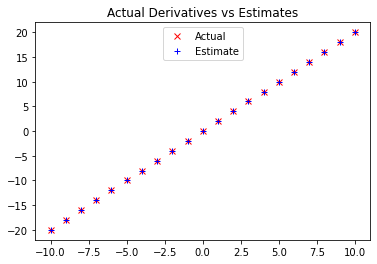

In [17]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = .001) for x in xs]

import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs Estimates")
plt.plot(xs, actuals, 'rx', label = 'Actual') #red x
plt.plot(xs, estimates, 'b+', label = 'Estimate') #blue +
plt.legend(loc = 9)
plt.show()

As can be seen above, estimating the derivative in this manner leads to identical results.

The partial derivative of each variable indicates how the function would change if that variable was changed. We gain gain this information from the function below. 

In [18]:
def partial_difference_quotient(f: Callable[[Vector], float],
                               v: Vector,
                               i: int,
                               h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) #add h to i-th element in v
        for j, v_j in enumerate(v)]

Then we can estimate the gradient in an identical way.

In [19]:
def estimate_gradient(f:Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
           for i in range(len(v))]

Still, estimating the gradient is not ideal. It is computationally expensive. Therefore, when possible, we will be calculating the gradient directly.

##### Using the Gradient

We can seek out the minimum by beginning at a random point and moving in the negative direction of the gradient.

In [20]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

In [21]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the gradient direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [22]:
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [23]:
#Pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

In [26]:
for epoch in range(1000):
    grad = sum_of_squares_gradient(v) #Compute gradient at v
    v = gradient_step(v, grad, -0.01) #Take a negative gradient step
    print(epoch, v)

0 [4.846762480705967e-10, 6.4905990633361926e-09, 1.4279575770966412e-08]
1 [4.749827231091848e-10, 6.360787082069469e-09, 1.3993984255547083e-08]
2 [4.6548306864700115e-10, 6.233571340428079e-09, 1.3714104570436141e-08]
3 [4.561734072740611e-10, 6.108899913619517e-09, 1.3439822479027419e-08]
4 [4.4704993912857987e-10, 5.986721915347127e-09, 1.3171026029446871e-08]
5 [4.381089403460083e-10, 5.866987477040184e-09, 1.2907605508857934e-08]
6 [4.2934676153908814e-10, 5.749647727499381e-09, 1.2649453398680775e-08]
7 [4.207598263083064e-10, 5.634654772949393e-09, 1.239646433070716e-08]
8 [4.1234462978214026e-10, 5.521961677490405e-09, 1.2148535044093016e-08]
9 [4.0409773718649744e-10, 5.411522443940597e-09, 1.1905564343211155e-08]
10 [3.960157824427675e-10, 5.303291995061785e-09, 1.1667453056346931e-08]
11 [3.8809546679391217e-10, 5.197226155160549e-09, 1.1434103995219993e-08]
12 [3.803335574580339e-10, 5.0932816320573384e-09, 1.1205421915315594e-08]
13 [3.7272688630887326e-10, 4.99141599941

227 [4.940500180620524e-12, 6.616129008260593e-11, 1.4555746636333656e-10]
228 [4.841690177008114e-12, 6.483806428095381e-11, 1.4264631703606984e-10]
229 [4.744856373467952e-12, 6.354130299533473e-11, 1.3979339069534844e-10]
230 [4.649959245998593e-12, 6.227047693542804e-11, 1.3699752288144146e-10]
231 [4.556960061078621e-12, 6.102506739671948e-11, 1.3425757242381263e-10]
232 [4.465820859857048e-12, 5.980456604878509e-11, 1.3157242097533638e-10]
233 [4.376504442659907e-12, 5.860847472780938e-11, 1.2894097255582966e-10]
234 [4.288974353806709e-12, 5.7436305233253194e-11, 1.2636215310471306e-10]
235 [4.203194866730575e-12, 5.628757912858813e-11, 1.238349100426188e-10]
236 [4.119130969395964e-12, 5.516182754601637e-11, 1.2135821184176643e-10]
237 [4.036748350008045e-12, 5.4058590995096046e-11, 1.189310476049311e-10]
238 [3.956013383007884e-12, 5.2977419175194124e-11, 1.165524266528325e-10]
239 [3.876893115347727e-12, 5.191787079169024e-11, 1.1422137811977584e-10]
240 [3.799355253040772e-1

391 [1.7982386717216575e-13, 2.4081324976815113e-12, 5.297987155209469e-12]
392 [1.7622738982872244e-13, 2.359969847727881e-12, 5.1920274121052795e-12]
393 [1.72702842032148e-13, 2.3127704507733233e-12, 5.088186863863174e-12]
394 [1.6924878519150506e-13, 2.2665150417578568e-12, 4.98642312658591e-12]
395 [1.6586380948767495e-13, 2.2211847409226996e-12, 4.8866946640541915e-12]
396 [1.6254653329792145e-13, 2.1767610461042458e-12, 4.788960770773108e-12]
397 [1.5929560263196302e-13, 2.133225825182161e-12, 4.693181555357646e-12]
398 [1.5610969057932377e-13, 2.0905613086785175e-12, 4.599317924250493e-12]
399 [1.529874967677373e-13, 2.0487500825049473e-12, 4.507331565765483e-12]
400 [1.4992774683238254e-13, 2.0077750808548483e-12, 4.417184934450174e-12]
401 [1.4692919189573488e-13, 1.9676195792377515e-12, 4.32884123576117e-12]
402 [1.439906080578202e-13, 1.9282671876529963e-12, 4.242264411045947e-12]
403 [1.411107958966638e-13, 1.8897018438999366e-12, 4.157419122825028e-12]
404 [1.382885799787

695 [3.8687827573801754e-16, 5.180925997769415e-15, 1.1398243001454382e-14]
696 [3.791407102232572e-16, 5.077307477814026e-15, 1.1170278141425293e-14]
697 [3.7155789601879207e-16, 4.9757613282577454e-15, 1.0946872578596788e-14]
698 [3.6412673809841623e-16, 4.8762461016925904e-15, 1.0727935127024852e-14]
699 [3.5684420333644793e-16, 4.778721179658738e-15, 1.0513376424484354e-14]
700 [3.4970731926971897e-16, 4.6831467560655635e-15, 1.0303108895994667e-14]
701 [3.4271317288432457e-16, 4.589483820944252e-15, 1.0097046718074773e-14]
702 [3.358589094266381e-16, 4.497694144525367e-15, 9.895105783713277e-15]
703 [3.2914173123810535e-16, 4.40774026163486e-15, 9.697203668039011e-15]
704 [3.2255889661334323e-16, 4.319585456402163e-15, 9.503259594678231e-15]
705 [3.1610771868107637e-16, 4.233193747274119e-15, 9.313194402784667e-15]
706 [3.0978556430745483e-16, 4.1485298723286365e-15, 9.126930514728974e-15]
707 [3.0358985302130576e-16, 4.0655592748820636e-15, 8.944391904434394e-15]
708 [2.975180559

866 [1.2224561422794755e-17, 1.637066541559306e-16, 3.6016114220271033e-16]
867 [1.198007019433886e-17, 1.60432521072812e-16, 3.5295791935865613e-16]
868 [1.1740468790452083e-17, 1.5722387065135576e-16, 3.4589876097148303e-16]
869 [1.1505659414643041e-17, 1.5407939323832864e-16, 3.389807857520534e-16]
870 [1.127554622635018e-17, 1.5099780537356206e-16, 3.322011700370123e-16]
871 [1.1050035301823176e-17, 1.4797784926609083e-16, 3.255571466362721e-16]
872 [1.0829034595786712e-17, 1.4501829228076902e-16, 3.1904600370354665e-16]
873 [1.0612453903870977e-17, 1.4211792643515365e-16, 3.126650836294757e-16]
874 [1.0400204825793558e-17, 1.3927556790645057e-16, 3.064117819568862e-16]
875 [1.0192200729277687e-17, 1.3649005654832157e-16, 3.002835463177485e-16]
876 [9.988356714692133e-18, 1.3376025541735515e-16, 2.942778753913935e-16]
877 [9.788589580398291e-18, 1.3108505030900804e-16, 2.8839231788356563e-16]
878 [9.592817788790325e-18, 1.284633493028279e-16, 2.826244715258943e-16]
879 [9.400961433

In [27]:
assert distance(v, [0, 0, 0]) < 0.001 #v should be close to 0

##### Choosing the Right Step Size

This process can be an art. Generally, a constant step size or a shrinking one is ideal.

##### Using Gradient Descent to Fit Models

We use gradient descent to make the loss of a model as small as possible.

In [29]:
# x ranges from -50 to 49. y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [30]:
#This function determines the error from a SINGLE data point.
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept  #The prediction of the model.
    error = (predicted - y)            #error is (predicted - actual).
    squared_error = error ** 2         #We'll minimize squared error
    grad = [2 * error * x, 2 * error]  #using its gradient.
    return grad

For the whole function, we will look at the mean squared error. The gradient of the mean squared error is the mean of the individual gradients.

In [31]:
from scratch.linear_algebra import vector_mean

In [32]:
#Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

In [34]:
learning_rate = 0.001

In [37]:
for epoch in range(5000):
    #Compute the mean of the gradients.
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    #Take a step in that direction.
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [19.999999879438974, 4.999799265816826]
1 [19.999999879680022, 4.999799667164631]
2 [19.99999987992059, 4.999800067709982]
3 [19.999999880160676, 4.999800467454483]
4 [19.999999880400285, 4.999800866399735]
5 [19.99999988063941, 4.999801264547336]
6 [19.99999988087806, 4.99980166189888]
7 [19.99999988111623, 4.999802058455961]
8 [19.99999988135393, 4.999802454220165]
9 [19.999999881591147, 4.999802849193079]
10 [19.999999881827897, 4.9998032433762845]
11 [19.99999988206417, 4.99980363677136]
12 [19.99999988229997, 4.999804029379882]
13 [19.9999998825353, 4.999804421203422]
14 [19.999999882770158, 4.99980481224355]
15 [19.99999988300455, 4.999805202501833]
16 [19.999999883238466, 4.999805591979834]
17 [19.999999883471922, 4.999805980679113]
18 [19.999999883704906, 4.999806368601227]
19 [19.99999988393743, 4.99980675574773]
20 [19.999999884169483, 4.999807142120171]
21 [19.999999884401074, 4.9998075277201]
22 [19.999999884632203, 4.999807912549061]
23 [19.99999988486287, 4.999808296608

241 [19.99999992557302, 4.999876079038871]
242 [19.999999925721834, 4.999876326806366]
243 [19.999999925870345, 4.999876574078476]
244 [19.999999926018557, 4.99987682085619]
245 [19.999999926166478, 4.9998770671404955]
246 [19.9999999263141, 4.999877312932381]
247 [19.999999926461427, 4.99987755823283]
248 [19.99999992660846, 4.999877803042826]
249 [19.9999999267552, 4.999878047363349]
250 [19.999999926901644, 4.999878291195377]
251 [19.9999999270478, 4.999878534539888]
252 [19.999999927193656, 4.999878777397856]
253 [19.99999992733923, 4.999879019770254]
254 [19.999999927484506, 4.9998792616580525]
255 [19.999999927629492, 4.999879503062221]
256 [19.99999992777419, 4.999879743983726]
257 [19.999999927918598, 4.999879984423533]
258 [19.999999928062717, 4.999880224382604]
259 [19.99999992820655, 4.999880463861902]
260 [19.999999928350093, 4.999880702862384]
261 [19.99999992849335, 4.99988094138501]
262 [19.99999992863632, 4.999881179430734]
263 [19.999999928779005, 4.999881417000508]
26

547 [19.999999959658133, 4.999932830767911]
548 [19.999999959738794, 4.999932965066033]
549 [19.99999995981929, 4.99993309909564]
550 [19.99999995989963, 4.999933232857268]
551 [19.999999959979803, 4.999933366351454]
552 [19.999999960059824, 4.999933499578731]
553 [19.999999960139675, 4.9999336325396335]
554 [19.999999960219377, 4.999933765234694]
555 [19.99999996029891, 4.999933897664444]
556 [19.99999996037829, 4.999934029829413]
557 [19.99999996045751, 4.999934161730133]
558 [19.99999996053657, 4.99993429336713]
559 [19.999999960615476, 4.999934424740933]
560 [19.99999996069422, 4.999934555852066]
561 [19.999999960772808, 4.999934686701057]
562 [19.999999960851238, 4.999934817288427]
563 [19.999999960929514, 4.999934947614701]
564 [19.999999961007628, 4.9999350776804015]
565 [19.999999961085592, 4.999935207486049]
566 [19.999999961163397, 4.999935337032162]
567 [19.999999961241045, 4.999935466319261]
568 [19.999999961318544, 4.999935595347864]
569 [19.99999996139588, 4.9999357241184

765 [19.9999999739222, 4.9999565804457795]
766 [19.999999973974337, 4.99995666725881]
767 [19.999999974026377, 4.9999567538982665]
768 [19.999999974078307, 4.999956840364496]
769 [19.999999974130134, 4.999956926657846]
770 [19.999999974181858, 4.99995701277866]
771 [19.99999997423348, 4.999957098727284]
772 [19.999999974284997, 4.999957184504063]
773 [19.99999997433641, 4.9999572701093395]
774 [19.999999974387723, 4.999957355543457]
775 [19.999999974438932, 4.9999574408067575]
776 [19.999999974490038, 4.999957525899583]
777 [19.999999974541044, 4.999957610822274]
778 [19.999999974591944, 4.99995769557517]
779 [19.999999974642748, 4.999957780158612]
780 [19.999999974693445, 4.999957864572937]
781 [19.999999974744046, 4.999957948818484]
782 [19.99999997479454, 4.9999580328955915]
783 [19.999999974844936, 4.999958116804595]
784 [19.999999974895232, 4.999958200545831]
785 [19.999999974945425, 4.999958284119635]
786 [19.99999997499552, 4.999958367526341]
787 [19.99999997504551, 4.9999584507

1043 [19.99999998505024, 4.999975108647433]
1044 [19.999999985080137, 4.999975158415189]
1045 [19.999999985109962, 4.9999752080834385]
1046 [19.999999985139738, 4.999975257652381]
1047 [19.99999998516945, 4.999975307122217]
1048 [19.9999999851991, 4.999975356493142]
1049 [19.999999985228694, 4.999975405765355]
1050 [19.999999985258228, 4.999975454939053]
1051 [19.9999999852877, 4.999975504014433]
1052 [19.999999985317118, 4.999975552991692]
1053 [19.999999985346474, 4.999975601871025]
1054 [19.999999985375773, 4.99997565065263]
1055 [19.99999998540501, 4.9999756993367]
1056 [19.999999985434194, 4.999975747923432]
1057 [19.999999985463315, 4.999975796413019]
1058 [19.99999998549238, 4.999975844805657]
1059 [19.999999985521388, 4.999975893101538]
1060 [19.999999985550335, 4.999975941300856]
1061 [19.999999985579226, 4.999975989403804]
1062 [19.99999998560806, 4.999976037410576]
1063 [19.999999985636833, 4.9999760853213635]
1064 [19.999999985665553, 4.999976133136357]
1065 [19.99999998569

1346 [19.99999999184794, 4.999986426817192]
1347 [19.999999991864243, 4.9999864539554055]
1348 [19.999999991880504, 4.999986481039359]
1349 [19.999999991896743, 4.999986508069161]
1350 [19.99999999191294, 4.999986535044919]
1351 [19.999999991929116, 4.999986561966742]
1352 [19.999999991945245, 4.999986588834738]
1353 [19.999999991961356, 4.999986615649014]
1354 [19.999999991977425, 4.999986642409677]
1355 [19.999999991993466, 4.9999866691168355]
1356 [19.999999992009474, 4.999986695770596]
1357 [19.99999999202545, 4.999986722371064]
1358 [19.999999992041396, 4.999986748918348]
1359 [19.999999992057308, 4.999986775412553]
1360 [19.99999999207319, 4.999986801853785]
1361 [19.999999992089037, 4.99998682824215]
1362 [19.999999992104854, 4.999986854577755]
1363 [19.99999999212064, 4.999986880860704]
1364 [19.999999992136395, 4.999986907091103]
1365 [19.999999992152116, 4.999986933269057]
1366 [19.999999992167808, 4.999986959394671]
1367 [19.999999992183465, 4.999986985468049]
1368 [19.99999

1658 [19.99999999563406, 4.999992730707836]
1659 [19.99999999564279, 4.9999927452420545]
1660 [19.999999995651503, 4.999992759747213]
1661 [19.999999995660193, 4.9999927742233705]
1662 [19.999999995668873, 4.999992788670584]
1663 [19.999999995677534, 4.999992803088912]
1664 [19.999999995686174, 4.999992817478411]
1665 [19.9999999956948, 4.9999928318391405]
1666 [19.99999999570341, 4.999992846171157]
1667 [19.999999995712, 4.999992860474518]
1668 [19.99999999572057, 4.999992874749281]
1669 [19.999999995729127, 4.999992888995503]
1670 [19.999999995737667, 4.999992903213241]
1671 [19.99999999574619, 4.999992917402552]
1672 [19.999999995754695, 4.999992931563493]
1673 [19.999999995763183, 4.99999294569612]
1674 [19.999999995771653, 4.999992959800491]
1675 [19.999999995780108, 4.999992973876662]
1676 [19.999999995788546, 4.9999929879246885]
1677 [19.999999995796966, 4.9999930019446275]
1678 [19.999999995805368, 4.999993015936536]
1679 [19.999999995813756, 4.999993029900468]
1680 [19.9999999

1915 [19.99999999738968, 4.999995653813033]
1916 [19.999999997394898, 4.999995662502797]
1917 [19.999999997400106, 4.999995671175186]
1918 [19.999999997405304, 4.999995679830236]
1919 [19.99999999741049, 4.999995688467981]
1920 [19.99999999741567, 4.999995697088455]
1921 [19.999999997420836, 4.999995705691694]
1922 [19.999999997425995, 4.999995714277731]
1923 [19.99999999743114, 4.999995722846602]
1924 [19.999999997436277, 4.99999573139834]
1925 [19.999999997441403, 4.99999573993298]
1926 [19.99999999744652, 4.999995748450555]
1927 [19.999999997451624, 4.9999957569511]
1928 [19.99999999745672, 4.99999576543465]
1929 [19.999999997461803, 4.9999957739012375]
1930 [19.99999999746688, 4.999995782350897]
1931 [19.999999997471942, 4.999995790783662]
1932 [19.999999997476998, 4.999995799199566]
1933 [19.999999997482043, 4.999995807598644]
1934 [19.999999997487077, 4.999995815980929]
1935 [19.9999999974921, 4.999995824346454]
1936 [19.999999997497117, 4.999995832695253]
1937 [19.99999999750212

2184 [19.99999999847637, 4.99999746315275]
2185 [19.999999998479414, 4.9999974682249215]
2186 [19.999999998482455, 4.999997473286951]
2187 [19.99999999848549, 4.99999747833886]
2188 [19.99999999848852, 4.9999974833806675]
2189 [19.99999999849154, 4.9999974884123946]
2190 [19.999999998494555, 4.999997493434061]
2191 [19.999999998497564, 4.999997498445688]
2192 [19.99999999850057, 4.999997503447294]
2193 [19.99999999850357, 4.9999975084389]
2194 [19.99999999850656, 4.999997513420526]
2195 [19.999999998509544, 4.999997518392192]
2196 [19.999999998512525, 4.999997523353917]
2197 [19.9999999985155, 4.999997528305721]
2198 [19.99999999851847, 4.999997533247625]
2199 [19.999999998521428, 4.999997538179648]
2200 [19.999999998524387, 4.99999754310181]
2201 [19.999999998527336, 4.9999975480141305]
2202 [19.99999999853028, 4.999997552916629]
2203 [19.99999999853322, 4.999997557809326]
2204 [19.99999999853615, 4.999997562692241]
2205 [19.99999999853908, 4.9999975675653925]
2206 [19.999999998542, 4

2418 [19.999999999046132, 4.999998411811172]
2419 [19.99999999904804, 4.999998414986596]
2420 [19.999999999049944, 4.999998418155671]
2421 [19.999999999051845, 4.999998421318409]
2422 [19.99999999905374, 4.999998424474824]
2423 [19.999999999055632, 4.999998427624928]
2424 [19.99999999905752, 4.999998430768734]
2425 [19.999999999059405, 4.999998433906254]
2426 [19.999999999061284, 4.999998437037501]
2427 [19.99999999906316, 4.9999984401624875]
2428 [19.999999999065036, 4.999998443281226]
2429 [19.9999999990669, 4.999998446393728]
2430 [19.99999999906877, 4.999998449500008]
2431 [19.99999999907063, 4.999998452600076]
2432 [19.99999999907249, 4.999998455693947]
2433 [19.999999999074344, 4.999998458781632]
2434 [19.999999999076195, 4.999998461863143]
2435 [19.999999999078042, 4.999998464938493]
2436 [19.999999999079883, 4.999998468007694]
2437 [19.999999999081727, 4.999998471070758]
2438 [19.99999999908356, 4.999998474127699]
2439 [19.999999999085393, 4.999998477178527]
2440 [19.9999999990

2610 [19.999999999350468, 4.9999989185255975]
2611 [19.999999999351765, 4.999998920687897]
2612 [19.99999999935306, 4.999998922845873]
2613 [19.999999999354355, 4.9999989249995345]
2614 [19.999999999355644, 4.99999892714889]
2615 [19.999999999356934, 4.999998929293947]
2616 [19.99999999935822, 4.999998931434717]
2617 [19.999999999359503, 4.999998933571206]
2618 [19.99999999936078, 4.999998935703423]
2619 [19.99999999936206, 4.999998937831377]
2620 [19.999999999363336, 4.999998939955076]
2621 [19.99999999936461, 4.999998942074529]
2622 [19.99999999936588, 4.999998944189745]
2623 [19.999999999367148, 4.999998946300731]
2624 [19.999999999368413, 4.999998948407496]
2625 [19.999999999369678, 4.99999895051005]
2626 [19.999999999370935, 4.9999989526084]
2627 [19.999999999372193, 4.999998954702554]
2628 [19.99999999937345, 4.999998956792521]
2629 [19.9999999993747, 4.99999895887831]
2630 [19.99999999937595, 4.999998960959928]
2631 [19.9999999993772, 4.999998963037385]
2632 [19.999999999378446,

2879 [19.99999999962087, 4.999999368748886]
2880 [19.99999999962163, 4.999999370011009]
2881 [19.999999999622386, 4.999999371270609]
2882 [19.99999999962314, 4.99999937252769]
2883 [19.999999999623896, 4.999999373782258]
2884 [19.999999999624645, 4.999999375034318]
2885 [19.999999999625395, 4.999999376283874]
2886 [19.999999999626144, 4.999999377530932]
2887 [19.999999999626894, 4.999999378775496]
2888 [19.999999999627637, 4.999999380017572]
2889 [19.999999999628383, 4.999999381257164]
2890 [19.999999999629125, 4.999999382494279]
2891 [19.999999999629868, 4.99999938372892]
2892 [19.999999999630607, 4.999999384961091]
2893 [19.999999999631346, 4.9999993861908]
2894 [19.999999999632085, 4.9999993874180495]
2895 [19.999999999632816, 4.999999388642846]
2896 [19.999999999633555, 4.999999389865192]
2897 [19.999999999634284, 4.999999391085096]
2898 [19.99999999963502, 4.99999939230256]
2899 [19.999999999635744, 4.99999939351759]
2900 [19.999999999636476, 4.999999394730191]
2901 [19.9999999996

3188 [19.99999999979573, 4.999999659889394]
3189 [19.999999999796138, 4.999999660569411]
3190 [19.999999999796547, 4.999999661248068]
3191 [19.99999999979695, 4.999999661925369]
3192 [19.999999999797357, 4.999999662601315]
3193 [19.999999999797765, 4.99999966327591]
3194 [19.999999999798167, 4.999999663949156]
3195 [19.999999999798572, 4.999999664621056]
3196 [19.999999999798973, 4.999999665291612]
3197 [19.999999999799375, 4.999999665960828]
3198 [19.999999999799776, 4.999999666628706]
3199 [19.999999999800178, 4.999999667295248]
3200 [19.999999999800576, 4.999999667960458]
3201 [19.999999999800977, 4.999999668624338]
3202 [19.99999999980137, 4.999999669286891]
3203 [19.999999999801773, 4.999999669948118]
3204 [19.999999999802167, 4.999999670608024]
3205 [19.99999999980256, 4.99999967126661]
3206 [19.99999999980296, 4.999999671923879]
3207 [19.99999999980335, 4.999999672579834]
3208 [19.999999999803745, 4.999999673234478]
3209 [19.999999999804135, 4.999999673887813]
3210 [19.999999999

3468 [19.999999999883364, 4.999999805801932]
3469 [19.9999999998836, 4.999999806190211]
3470 [19.99999999988383, 4.999999806577715]
3471 [19.999999999884064, 4.999999806964443]
3472 [19.999999999884295, 4.999999807350398]
3473 [19.999999999884526, 4.999999807735581]
3474 [19.999999999884757, 4.999999808119995]
3475 [19.999999999884988, 4.99999980850364]
3476 [19.999999999885215, 4.999999808886518]
3477 [19.99999999988545, 4.99999980926863]
3478 [19.999999999885674, 4.999999809649978]
3479 [19.999999999885905, 4.999999810030563]
3480 [19.999999999886132, 4.999999810410388]
3481 [19.99999999988636, 4.999999810789454]
3482 [19.999999999886587, 4.999999811167761]
3483 [19.999999999886814, 4.999999811545313]
3484 [19.99999999988704, 4.999999811922109]
3485 [19.999999999887265, 4.999999812298152]
3486 [19.999999999887493, 4.999999812673443]
3487 [19.999999999887716, 4.9999998130479835]
3488 [19.99999999988794, 4.999999813421775]
3489 [19.999999999888164, 4.99999981379482]
3490 [19.9999999998

3714 [19.999999999928715, 4.99999988130776]
3715 [19.999999999928853, 4.999999881545073]
3716 [19.999999999929, 4.999999881781912]
3717 [19.99999999992914, 4.999999882018278]
3718 [19.99999999992928, 4.99999988225417]
3719 [19.999999999929425, 4.999999882489591]
3720 [19.999999999929564, 4.99999988272454]
3721 [19.999999999929706, 4.999999882959021]
3722 [19.999999999929845, 4.999999883193033]
3723 [19.999999999929987, 4.999999883426577]
3724 [19.999999999930125, 4.999999883659654]
3725 [19.999999999930267, 4.999999883892265]
3726 [19.999999999930402, 4.999999884124411]
3727 [19.999999999930544, 4.999999884356092]
3728 [19.999999999930683, 4.999999884587311]
3729 [19.99999999993082, 4.999999884818067]
3730 [19.99999999993096, 4.999999885048362]
3731 [19.9999999999311, 4.9999998852781955]
3732 [19.999999999931234, 4.99999988550757]
3733 [19.999999999931376, 4.999999885736487]
3734 [19.999999999931507, 4.999999885964945]
3735 [19.99999999993165, 4.999999886192946]
3736 [19.99999999993178

4025 [19.999999999961744, 4.999999936305498]
4026 [19.999999999961823, 4.9999999364328485]
4027 [19.999999999961897, 4.999999936559945]
4028 [19.999999999961975, 4.999999936686787]
4029 [19.99999999996205, 4.999999936813375]
4030 [19.999999999962125, 4.999999936939711]
4031 [19.999999999962203, 4.999999937065793]
4032 [19.999999999962277, 4.999999937191624]
4033 [19.999999999962352, 4.999999937317202]
4034 [19.99999999996243, 4.999999937442531]
4035 [19.9999999999625, 4.999999937567608]
4036 [19.99999999996258, 4.999999937692436]
4037 [19.999999999962654, 4.999999937817013]
4038 [19.99999999996273, 4.999999937941342]
4039 [19.9999999999628, 4.9999999380654225]
4040 [19.999999999962878, 4.999999938189254]
4041 [19.99999999996295, 4.999999938312839]
4042 [19.999999999963027, 4.999999938436176]
4043 [19.999999999963098, 4.999999938559267]
4044 [19.999999999963173, 4.9999999386821115]
4045 [19.999999999963247, 4.99999993880471]
4046 [19.99999999996332, 4.999999938927064]
4047 [19.999999999

4315 [19.99999999997859, 4.99999996435204]
4316 [19.99999999997863, 4.999999964423314]
4317 [19.999999999978677, 4.999999964494447]
4318 [19.999999999978716, 4.999999964565436]
4319 [19.999999999978762, 4.9999999646362845]
4320 [19.9999999999788, 4.999999964706991]
4321 [19.999999999978847, 4.9999999647775555]
4322 [19.999999999978886, 4.999999964847979]
4323 [19.999999999978932, 4.999999964918262]
4324 [19.99999999997897, 4.999999964988404]
4325 [19.999999999979014, 4.9999999650584055]
4326 [19.999999999979057, 4.999999965128268]
4327 [19.999999999979096, 4.999999965197991]
4328 [19.999999999979142, 4.999999965267574]
4329 [19.99999999997918, 4.999999965337018]
4330 [19.999999999979224, 4.999999965406324]
4331 [19.999999999979263, 4.9999999654754905]
4332 [19.99999999997931, 4.999999965544519]
4333 [19.999999999979345, 4.9999999656134095]
4334 [19.99999999997939, 4.9999999656821625]
4335 [19.99999999997943, 4.999999965750778]
4336 [19.999999999979472, 4.9999999658192555]
4337 [19.9999

4639 [19.999999999988805, 4.999999981361339]
4640 [19.999999999988827, 4.999999981398605]
4641 [19.99999999998885, 4.9999999814357965]
4642 [19.999999999988873, 4.9999999814729135]
4643 [19.999999999988894, 4.999999981509957]
4644 [19.99999999998892, 4.999999981546925]
4645 [19.999999999988937, 4.99999998158382]
4646 [19.99999999998896, 4.9999999816206415]
4647 [19.999999999988983, 4.999999981657389]
4648 [19.999999999989004, 4.999999981694063]
4649 [19.99999999998903, 4.999999981730664]
4650 [19.999999999989047, 4.999999981767192]
4651 [19.999999999989072, 4.999999981803646]
4652 [19.999999999989093, 4.999999981840028]
4653 [19.999999999989114, 4.9999999818763365]
4654 [19.999999999989136, 4.999999981912573]
4655 [19.999999999989157, 4.999999981948737]
4656 [19.999999999989182, 4.999999981984829]
4657 [19.9999999999892, 4.9999999820208485]
4658 [19.999999999989225, 4.999999982056796]
4659 [19.999999999989242, 4.999999982092671]
4660 [19.999999999989267, 4.999999982128475]
4661 [19.999

4911 [19.999999999993506, 4.999999989185831]
4912 [19.999999999993516, 4.999999989207453]
4913 [19.99999999999353, 4.999999989229031]
4914 [19.999999999993545, 4.999999989250567]
4915 [19.999999999993555, 4.999999989272059]
4916 [19.99999999999357, 4.999999989293508]
4917 [19.999999999993584, 4.999999989314915]
4918 [19.999999999993594, 4.9999999893362785]
4919 [19.99999999999361, 4.999999989357599]
4920 [19.99999999999362, 4.999999989378877]
4921 [19.999999999993634, 4.999999989400113]
4922 [19.999999999993648, 4.9999999894213065]
4923 [19.99999999999366, 4.999999989442458]
4924 [19.999999999993673, 4.999999989463566]
4925 [19.999999999993683, 4.999999989484633]
4926 [19.999999999993697, 4.999999989505657]
4927 [19.999999999993708, 4.999999989526639]
4928 [19.999999999993722, 4.99999998954758]
4929 [19.999999999993737, 4.999999989568479]
4930 [19.999999999993747, 4.999999989589336]
4931 [19.99999999999376, 4.999999989610151]
4932 [19.999999999993772, 4.999999989630925]
4933 [19.999999

In [38]:
slope, intercept = theta
assert 19.9 < slope < 20.1, "Slope should be about 20"
assert 4.9 < intercept < 5.1, "Intercept should be about 5"

##### Minibatch and Stochastic Gradient Descent

The above method is costly for larger datasets. 

In [39]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') #This allows us to type "generic" functions

In [41]:
def minibatches(dataset: List[T],
               batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates 'batch_size' -sized minibatches from the dataset"""
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts) #Shuffles the batches.
    
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

Now, we can try again using minibatches.

In [42]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [19.789296713758034, -2.959907944920468]
1 [20.284184086711708, -2.8324560223950668]
2 [20.060612888949457, -2.788813877233713]
3 [21.566179823523672, -2.7077231343305237]
4 [20.231781768601977, -2.7927924326103692]
5 [19.92087872710081, -2.757404230829986]
6 [19.69473697959491, -2.6830432769163366]
7 [20.518803871884142, -2.6105114521956687]
8 [19.66807389092577, -2.6048159846850885]
9 [20.013162096919856, -2.555813658500705]
10 [20.533780890603502, -2.531139917920414]
11 [21.462541572658584, -2.4707189965292513]
12 [19.399444446325056, -2.349927202529753]
13 [20.228648155910612, -2.1508663316540373]
14 [18.889825788893454, -2.0656460546142577]
15 [20.181513287828164, -2.3790512999405795]
16 [20.020220944690784, -2.3353824869665942]
17 [21.163994261918653, -2.207605348064482]
18 [20.323536632857675, -1.4784486407967923]
19 [20.325504780330103, -1.4403619237596503]
20 [19.819759063296296, -1.3446342907353719]
21 [19.67873096159185, -1.3116989547441935]
22 [20.080652273307376, -1.2697

229 [20.030549590314862, 4.569456645344883]
230 [19.97789263487718, 4.571002309228057]
231 [20.170779708111045, 4.581078933091731]
232 [20.019952527856674, 4.5713799398824255]
233 [19.984869386833, 4.590079874400351]
234 [19.824297875139894, 4.601666493819409]
235 [19.99142825904931, 4.604601910214469]
236 [19.819529182046598, 4.6157336183393385]
237 [20.013182563406595, 4.623958855218487]
238 [20.01549342174943, 4.625513838663205]
239 [20.011734492666402, 4.627479991012306]
240 [20.006344789176723, 4.627878535098048]
241 [19.98522155797774, 4.635375555001395]
242 [19.998646689839305, 4.650970565143538]
243 [20.00020966035054, 4.653151045402584]
244 [20.00032515414498, 4.655299925601954]
245 [19.986495538687116, 4.6702618248551895]
246 [20.05263243372509, 4.6738201810202735]
247 [20.000242797781542, 4.677852119970564]
248 [20.02037054412565, 4.680429309741716]
249 [20.01392550615025, 4.680024212632289]
250 [20.009980889047508, 4.681708053841074]
251 [19.997110672614003, 4.6832160733286

468 [20.000941677600803, 4.984798265013659]
469 [20.000590017042267, 4.985606881169427]
470 [20.00028443615216, 4.985616676506271]
471 [20.000283681979376, 4.985707443706439]
472 [19.999351710932384, 4.985746694838655]
473 [20.000628961297938, 4.98576891652032]
474 [19.999354517211103, 4.985795260485459]
475 [19.99995756699403, 4.986390226811996]
476 [20.00015511334749, 4.986473816749897]
477 [19.99922101897818, 4.986517120751079]
478 [20.002643103122335, 4.986689385262018]
479 [19.999620001997382, 4.985979275766964]
480 [20.000637436383265, 4.986013196218617]
481 [19.99957861333991, 4.986211018521472]
482 [20.000027410722815, 4.986306888133592]
483 [20.000479189073005, 4.98668920439933]
484 [20.00094601936111, 4.98673478102025]
485 [19.994118535217847, 4.98706027106856]
486 [19.99827326102989, 4.986989408879422]
487 [20.00022859195158, 4.987209657581123]
488 [20.000369339945326, 4.987299385531762]
489 [20.002422515651517, 4.987421611177843]
490 [20.00036812107196, 4.987292188794203]
4

737 [19.999830327121142, 4.999620788028201]
738 [19.99997448495429, 4.999698555187045]
739 [19.99998467650558, 4.9997122405982255]
740 [20.000012295446794, 4.999712600007132]
741 [20.00000526345759, 4.999712899702302]
742 [19.999990878574362, 4.999716179158338]
743 [19.999970482736536, 4.9997186506704825]
744 [20.00001759705653, 4.999720008727618]
745 [20.000012277193754, 4.999719422716292]
746 [20.000011762222094, 4.999720123178796]
747 [19.999990219056585, 4.999726094525981]
748 [19.999972473727162, 4.999728412117672]
749 [19.999987191662875, 4.999740205150682]
750 [19.99998872236804, 4.999751987446695]
751 [19.999999847430324, 4.999753639725454]
752 [20.000039833686692, 4.999757786167308]
753 [20.000003643521655, 4.999770428805286]
754 [19.99996400961855, 4.999773758555192]
755 [20.000034045913306, 4.999771955878589]
756 [19.999994993157614, 4.999777544832627]
757 [20.000044261700232, 4.999780087060054]
758 [19.999981167259726, 4.999783642662798]
759 [20.000034029325235, 4.999784533

972 [19.999999924012954, 4.999982945150304]
973 [20.000000281639835, 4.999983005706618]
974 [19.999999324560154, 4.999983335325023]
975 [19.999998350833707, 4.9999834739865925]
976 [19.999999231766555, 4.999984549847455]
977 [19.999993365527118, 4.999984993496951]
978 [19.999999975680126, 4.999986495147788]
979 [19.999999392293006, 4.999986545415417]
980 [19.99999998210821, 4.9999871286242525]
981 [19.99999869251713, 4.999987253357859]
982 [20.00000200435682, 4.99998726507205]
983 [20.000001050194072, 4.999987277639706]
984 [20.000005366023295, 4.999987653414911]
985 [20.000005274987128, 4.999988186232797]
986 [19.999999809740636, 4.999987989465016]
987 [19.999994522390683, 4.999988325364783]
988 [19.99999840180595, 4.999988252622266]
989 [19.999998497674778, 4.999988323619805]
990 [20.000000427892328, 4.999988296004536]
991 [20.00000043673028, 4.999988794109709]
992 [19.99999524905323, 4.999989081027534]
993 [19.999999635309198, 4.999989372714371]
994 [19.999999982077668, 4.9999894428

In [43]:
slope, intercept = theta
assert 19.9 < slope < 20.1, "Slope should be about 20"
assert 4.9 < intercept < 5.1, "Intercept should be about 5"

We can also use stochastic gradient descent, where we take gradient steps after each training example. 

In [44]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

In [45]:
for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [20.096898970372123, 0.1771384945015437]
1 [20.092740969269894, 0.384057414554293]
2 [20.088762003698218, 0.5820987205379589]
3 [20.08495379520828, 0.7716433090862542]
4 [20.08130897417029, 0.953055722179189]
5 [20.077820491832206, 1.1266848599895722]
6 [20.074481704432802, 1.2928646541297983]
7 [20.071286182921263, 1.4519147103645222]
8 [20.068227718576086, 1.6041409207322022]
9 [20.06530049913594, 1.7498360536303266]
10 [20.062498858494365, 1.889280317143349]
11 [20.059817417383105, 2.022741896860071]
12 [20.057251033034433, 2.150477472674332]
13 [20.054794748519516, 2.27273271177329]
14 [20.052443841685093, 2.389742740962681]
15 [20.050193813548205, 2.5017325996904627]
16 [20.04804030748634, 2.6089176721961733]
17 [20.04597921113904, 2.7115041019811374]
18 [20.04400651685718, 2.809689187874073]
19 [20.042118473575044, 2.90366176389733]
20 [20.04031141466642, 2.9936025624564424]
21 [20.03858191370896, 3.079684562195568]
22 [20.03692660478718, 3.1620733204438136]
23 [20.035342307954

In [46]:
slope, intercept = theta
assert 19.9 < slope < 20.1, "Slope should be about 20"
assert 4.9 < intercept < 5.1, "Intercept should be about 5"

Minibatches, or even single data points, lead to more updates and even potentially faster converging time. The risk is that the gradient of a single point or small minibatch may be in a different direction than the gradient of the dataset as a whole.